In [2]:
import yfinance as yf
import datetime as dt
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import ta
import pandas_datareader.data as web

[*********************100%***********************]  1 of 1 completed
2.855806819955142


/var/folders/cr/2_qqg8dj5mvchp4h_b_wydh40000gn/T/ipykernel_17785/2483254628.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ohlcv['pct'][i] = (ohlcv['Adj Close'][i]/ohlcv['Adj Close'][i-1]-1)*100


<AxesSubplot:xlabel='Date'>

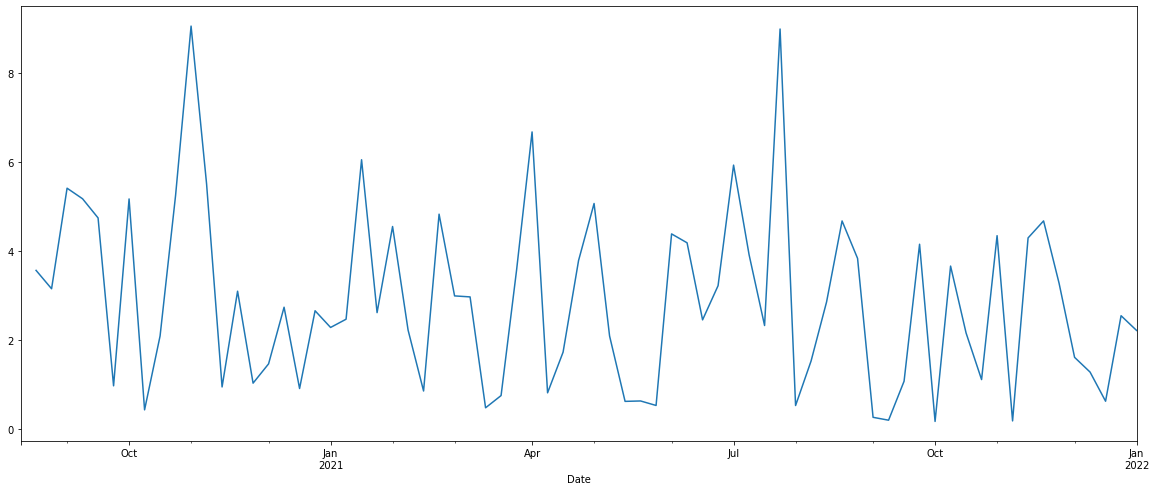

In [10]:
# Checking pct on hourly/daily/monthly etc
ticker = "AMZN"
ohlcv = yf.download(ticker,
                    dt.date.today()-dt.timedelta(500),
                    dt.datetime.today(),
                    #interval="1h")
                    interval="1wk")

ohlcv['pct'] = np.nan
for i in range(1,len(ohlcv)):
    ohlcv['pct'][i] = (ohlcv['Adj Close'][i]/ohlcv['Adj Close'][i-1]-1)*100
    
print(np.nansum(abs(ohlcv['pct']))/len(ohlcv['pct']))
plt.figure(figsize=(20,8))
abs(ohlcv['pct']).plot()

[*********************100%***********************]  1 of 1 completed
329.94322776794434
173.0935431103349


/var/folders/cr/2_qqg8dj5mvchp4h_b_wydh40000gn/T/ipykernel_17785/3304000813.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ohlcv['candleRange'][i] = (ohlcv['High'][i] - ohlcv['Low'][i])*10E3


<AxesSubplot:xlabel='Date'>

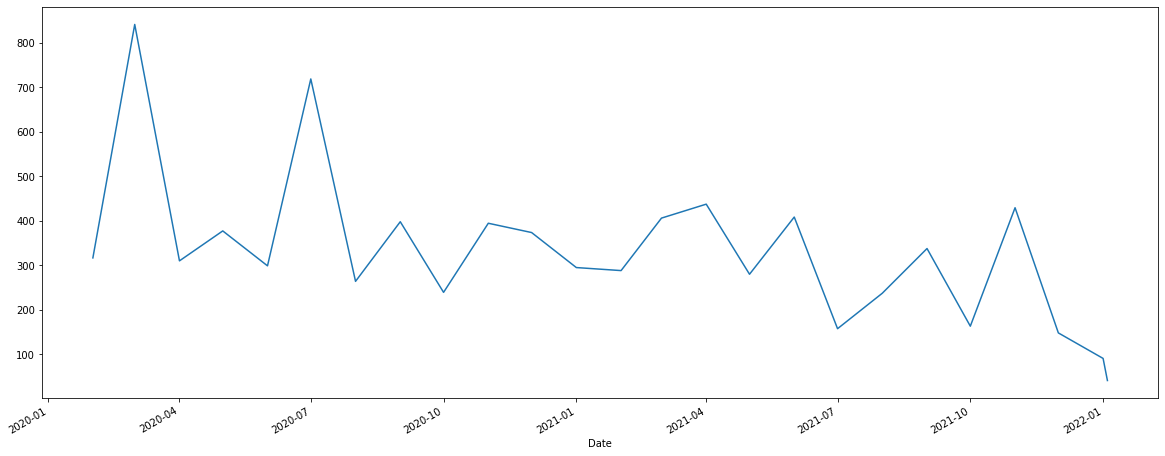

In [22]:
# candle range in pips

ticker = "EURUSD=X"
ohlcv = yf.download(ticker,
                    dt.date.today()-dt.timedelta(730),
                    dt.datetime.today(),
                    interval="1mo")

ohlcv['candleRange'] = np.nan
for i in range(0,len(ohlcv)):
    ohlcv['candleRange'][i] = (ohlcv['High'][i] - ohlcv['Low'][i])*10E3
    
#print(np.nansum(ohlcv['candleRange'])/len(ohlcv['candleRange']))
print(np.nansum(ohlcv['candleRange'].mean()))
print(np.nansum(ohlcv['candleRange'].std()))
plt.figure(figsize=(20,8))
ohlcv['candleRange'].plot()

/var/folders/cr/2_qqg8dj5mvchp4h_b_wydh40000gn/T/ipykernel_17785/3815852920.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ohlcv['Weekday'][i] = ohlcv['DateObj'][i].weekday()


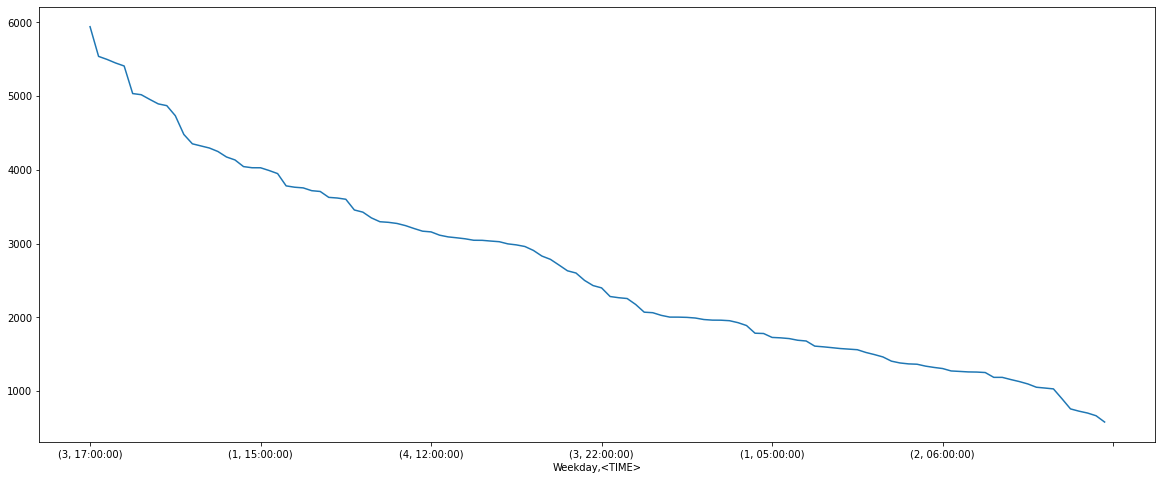

In [25]:
# volume info

# just for reference
# ohlcv = web.DataReader(ticker, 'quandl', '2015-01-01', '2015-01-05')

ohlcv = pd.read_csv(os.path.join(os.getcwd(),'CSVData',
                                 'EURUSD_H1_202004010000_202104011200.csv'),
                    delimiter='\t')

ohlcv['Weekday'] = '' 
ohlcv['DateObj'] = pd.to_datetime(ohlcv['<DATE>'], format = '%Y.%m.%d')
for i in range(0,len(ohlcv)):
    ohlcv['Weekday'][i] = ohlcv['DateObj'][i].weekday()

df = ohlcv.groupby(['Weekday', '<TIME>']).mean()
df = df.sort_values(by=['<TICKVOL>'], ascending=False)

plt.figure(figsize=(20,8))    
df['<TICKVOL>'].plot()

df = ohlcv.groupby(['Weekday']).mean()
df = df.sort_values(by=['<TICKVOL>'], ascending=False)

df = ohlcv.groupby(['<TIME>']).mean()
df = df.sort_values(by=['<TICKVOL>'], ascending=False)

/var/folders/cr/2_qqg8dj5mvchp4h_b_wydh40000gn/T/ipykernel_17785/3925523465.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ohlcv['Weekday'][i] = ohlcv['DateObj'][i].weekday()
/var/folders/cr/2_qqg8dj5mvchp4h_b_wydh40000gn/T/ipykernel_17785/3925523465.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ohlcv['candleRange'][i] = (ohlcv['<HIGH>'][i] - ohlcv['<LOW>'][i])*10E3


<AxesSubplot:xlabel='Weekday,<TIME>'>

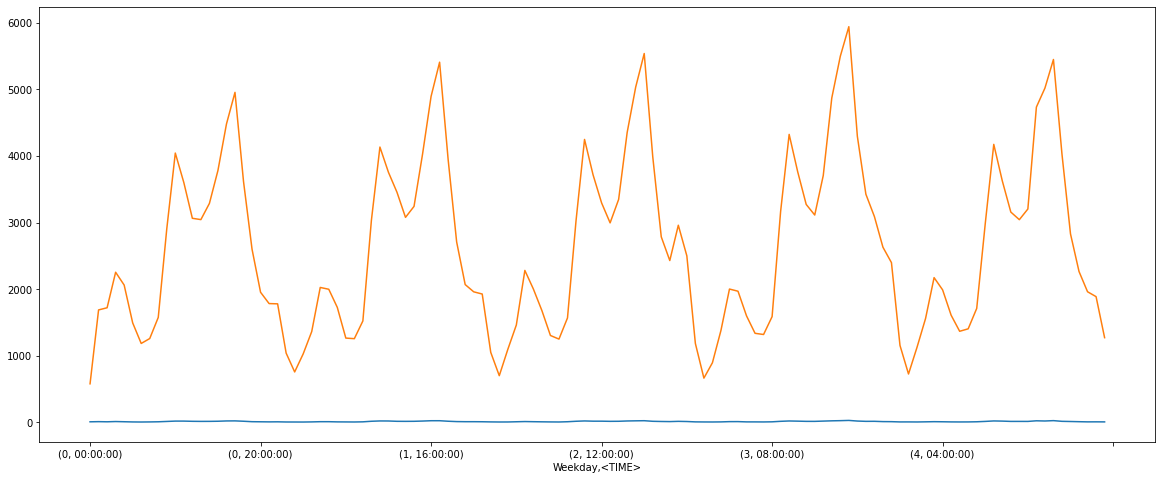

In [27]:
# average candle length, per weekday/hour

ohlcv = pd.read_csv(os.path.join(os.getcwd(), 'CSVData',
                                 'EURUSD_H1_202004010000_202104011200.csv'),
                    delimiter='\t')

ohlcv['Weekday'] = '' 
ohlcv['DateObj'] = pd.to_datetime(ohlcv['<DATE>'], format = '%Y.%m.%d')
for i in range(0,len(ohlcv)):
    ohlcv['Weekday'][i] = ohlcv['DateObj'][i].weekday()

ohlcv['candleRange'] = np.nan
for i in range(0,len(ohlcv)):
    ohlcv['candleRange'][i] = (ohlcv['<HIGH>'][i] - ohlcv['<LOW>'][i])*10E3
    
df = ohlcv.groupby(['Weekday', '<TIME>']).mean()
plt.figure(figsize=(20,8))    

df['candleRange'].plot()
df['<TICKVOL>'].plot()